In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
cong_gov_df = pd.read_csv('../csv/cleaned_bills.csv')
guardian_df = pd.read_csv('../csv/guardian_mentions_for_merge.csv')

In [47]:
guardian_df

,bill_merge_id,congress,bill_type,number,chamber,date,bill_id,bill_number,total_mentions,coverage_span_days,...,election_year,president,congress_number,first_mention_date,last_mention_date,unique_sections,days_into_congress,got_guardian_coverage,mention_year,pre_election_coverage
0,116.H.46,116.0,HJRES,46,H,2019-03-26,H.J.Res. 46 (116th Congress),H.J.Res. 46,1,0.000000,...,False,Trump,116.0,2019-03-26T12:58:37Z,2019-03-26T12:58:37Z,1,84.540706,True,2019.0,False
1,114.H.1,114.0,HR,1,H,2015-10-28,H.R. 1 (114th Congress),H.R. 1,4,288.514063,...,False,Obama,114.0,2015-10-28T21:39:50Z,2016-08-12T10:00:05Z,1,300.902662,True,2015.0,False
2,115.H.1,115.0,HR,1,H,2018-11-30,H.R. 1 (115th Congress),H.R. 1,1,0.000000,...,True,Trump,115.0,2018-11-30T14:02:24Z,2018-11-30T14:02:24Z,1,333.585000,True,2018.0,True
3,116.H.1,116.0,HR,1,H,2019-01-03,H.R. 1 (116th Congress),H.R. 1,9,682.769363,...,False,Trump,116.0,2019-01-03T13:32:09Z,2020-11-16T08:00:02Z,1,2.563993,True,2019.0,False
4,117.H.1,117.0,HR,1,H,2021-01-16,H.R. 1 (117th Congress),H.R. 1,19,159.066227,...,False,Biden,117.0,2021-01-16T12:24:40Z,2021-06-24T14:00:02Z,1,15.517130,True,2021.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,118.S.990,118.0,S,990,S,2023-06-12,S. 990 (118th Congress),S. 990,1,0.000000,...,False,Biden,118.0,2023-06-12T14:00:22Z,2023-06-12T14:00:22Z,1,162.583588,True,2023.0,False
1119,114.S.991,114.0,S,991,S,2016-03-20,S. 991 (114th Congress),S. 991,1,0.000000,...,True,Obama,114.0,2016-03-20T12:00:38Z,2016-03-20T12:00:38Z,1,79.500440,True,2016.0,False
1120,117.S.1,117.0,SRES,1,S,2021-04-10,S.Res. 1 (117th Congress),S.Res. 1,2,73.165579,...,False,Biden,117.0,2021-04-10T09:00:02Z,2021-06-22T12:58:28Z,1,99.375023,True,2021.0,False
1121,114.S.556,114.0,SRES,556,S,2016-02-25,S.Res. 556 (114th Congress),S.Res. 556,1,0.000000,...,True,Obama,114.0,2016-02-25T22:04:15Z,2016-02-25T22:04:15Z,1,55.919618,True,2016.0,False


In [48]:
guardian_df.unique_sections.unique() # nothing useful here

array([1])

In [49]:
guardian_df.congress.unique() # why is there a nan here?

array([116., 114., 115., 117., 118., 113.,  nan])

In [50]:
guardian_df

,bill_merge_id,congress,bill_type,number,chamber,date,bill_id,bill_number,total_mentions,coverage_span_days,...,election_year,president,congress_number,first_mention_date,last_mention_date,unique_sections,days_into_congress,got_guardian_coverage,mention_year,pre_election_coverage
0,116.H.46,116.0,HJRES,46,H,2019-03-26,H.J.Res. 46 (116th Congress),H.J.Res. 46,1,0.000000,...,False,Trump,116.0,2019-03-26T12:58:37Z,2019-03-26T12:58:37Z,1,84.540706,True,2019.0,False
1,114.H.1,114.0,HR,1,H,2015-10-28,H.R. 1 (114th Congress),H.R. 1,4,288.514063,...,False,Obama,114.0,2015-10-28T21:39:50Z,2016-08-12T10:00:05Z,1,300.902662,True,2015.0,False
2,115.H.1,115.0,HR,1,H,2018-11-30,H.R. 1 (115th Congress),H.R. 1,1,0.000000,...,True,Trump,115.0,2018-11-30T14:02:24Z,2018-11-30T14:02:24Z,1,333.585000,True,2018.0,True
3,116.H.1,116.0,HR,1,H,2019-01-03,H.R. 1 (116th Congress),H.R. 1,9,682.769363,...,False,Trump,116.0,2019-01-03T13:32:09Z,2020-11-16T08:00:02Z,1,2.563993,True,2019.0,False
4,117.H.1,117.0,HR,1,H,2021-01-16,H.R. 1 (117th Congress),H.R. 1,19,159.066227,...,False,Biden,117.0,2021-01-16T12:24:40Z,2021-06-24T14:00:02Z,1,15.517130,True,2021.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,118.S.990,118.0,S,990,S,2023-06-12,S. 990 (118th Congress),S. 990,1,0.000000,...,False,Biden,118.0,2023-06-12T14:00:22Z,2023-06-12T14:00:22Z,1,162.583588,True,2023.0,False
1119,114.S.991,114.0,S,991,S,2016-03-20,S. 991 (114th Congress),S. 991,1,0.000000,...,True,Obama,114.0,2016-03-20T12:00:38Z,2016-03-20T12:00:38Z,1,79.500440,True,2016.0,False
1120,117.S.1,117.0,SRES,1,S,2021-04-10,S.Res. 1 (117th Congress),S.Res. 1,2,73.165579,...,False,Biden,117.0,2021-04-10T09:00:02Z,2021-06-22T12:58:28Z,1,99.375023,True,2021.0,False
1121,114.S.556,114.0,SRES,556,S,2016-02-25,S.Res. 556 (114th Congress),S.Res. 556,1,0.000000,...,True,Obama,114.0,2016-02-25T22:04:15Z,2016-02-25T22:04:15Z,1,55.919618,True,2016.0,False


In [51]:
# reduce to only the columns which aren't already contained in congress.gov file
useful_columns = ['bill_merge_id', 'total_mentions', 'coverage_span_days',
                  'mentions_per_month', 'coverage_type', 'covered_in_first_90_days',
                  'sustained_coverage', 'sentiment_ratio', 'sentiment_score', 
                  'positive', 'negative', 'degree_centrality', 'betweenness_centrality',
                  'closeness_centrality', 'election_year', 'president', 
                  'first_mention_date', 'last_mention_date', 'days_into_congress',
                  'got_guardian_coverage', 'pre_election_coverage']
guardian_simple_df = guardian_df[useful_columns].rename(columns={'bill_merge_id':'id'})

In [52]:
guardian_simple_df = guardian_simple_df.dropna() 
g_ids = set(guardian_simple_df.id.unique())
c_ids = set(cong_gov_df.id.unique())
overlap = g_ids & c_ids
others = g_ids - c_ids
len(g_ids), len(c_ids), len(overlap) # uh oh, looks like some bills are missing
# part of problem is id uses HR for one and H for other, but still some missing entirely..

(1113, 60139, 554)

In [53]:
def format_bill_id(id):
    # change (congress).HR.(num) to (congress).H.(num)
    congress, house, num = id.split('.')
    house = house[0]
    return f'{congress}.{house}.{num}'

cong_gov_df.id = cong_gov_df.id.apply(format_bill_id)

In [54]:
df = pd.merge(cong_gov_df.drop(columns='Unnamed: 0'), guardian_simple_df, on='id')

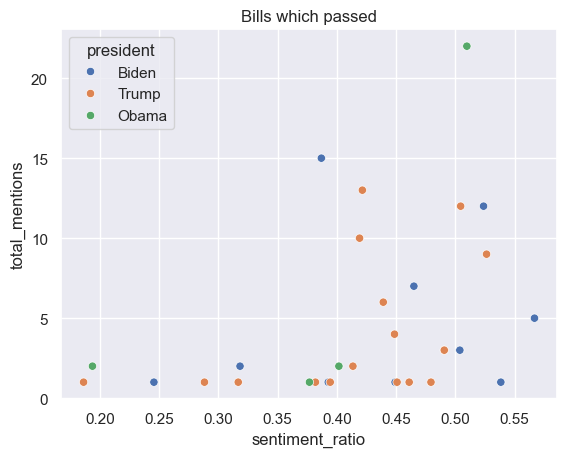

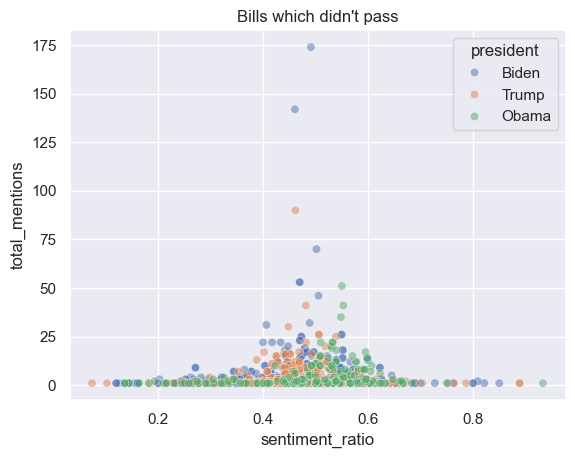

In [55]:
sns.scatterplot(df[df.law], y='total_mentions', x='sentiment_ratio', hue='president')
plt.title('Bills which passed')
plt.show()
sns.scatterplot(df[~df.law], y='total_mentions', x='sentiment_ratio', hue='president', alpha=0.5)

plt.title('Bills which didn\'t pass')
plt.show()

Seems that bills with a high sentiment ratio or high number of mentions were less likely to pass

Text(0.5, 1.0, 'Correlation with whether bill passes')

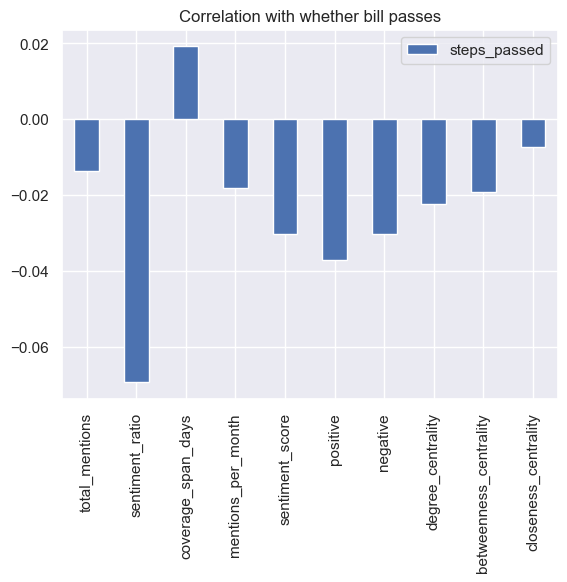

In [91]:
# lets consider how far a bill got by adding the number of steps it passed
df['steps_passed'] = 1*df.passed_senate+1*df.passed_house+1*df.to_president+1*df.law 
df['weighted_steps_passed'] = 1*df.passed_senate+1*df.passed_house+1*df.to_president+5*1*df.law
numeric_cols = ['steps_passed', 'weighted_steps_passed', 'total_mentions', 'sentiment_ratio', 'coverage_span_days',
                  'mentions_per_month','sentiment_score', 
                  'positive', 'negative', 'degree_centrality', 'betweenness_centrality',
                  'closeness_centrality']
                   
target_cols = ['steps_passed']
df[numeric_cols].corr()[target_cols].loc['total_mentions':].plot.bar()
plt.title('Correlation with whether bill passes')

Very low correlation all around, which makes sense given the small proportion of bills which pass. The highest in absolute value are sentiment_ratio and coverage_span, which makes senese. Bills which are percieved negatively are more engaging to read about. Nobody wants to read an article about a bill which they don't have an emotional stake in. Coverage span also makes sense: as the bill looks more and more likely to pass, reporters become more likely to continue writing about it. Still, the effect of these biases is apparently very small overall. 

Let's look at the proportion of bills which pass conditioned on whether there were social media mentions.

In [92]:
total = cong_gov_df
total_passed = total[total.law]
soc = df
soc_and_pass = df[df.law]

prob_pass = len(total_passed) / len(total)
prob_soc = len(soc) / len(total)
p_pass_given_soc = (len(soc_and_pass) / len(soc))
prob_soc_given_passed = len(soc_and_pass) / len(total_passed)

print(f'P(pass) = {prob_pass}\nProb(social) = {prob_soc}\nProb(pass|social) = {p_pass_given_soc}\nProb(social|pass) = {prob_soc_given_passed}')

P(pass) = 0.023844759640166947
Prob(social) = 0.014100666788606395
Prob(pass|social) = 0.036556603773584904
Prob(social|pass) = 0.021617852161785217


There is an obvious bias: if a bill passes, then social media mentions are almost twice as likely. Conversely, if social media mentions a bill then it is nearly twice as likely to pass. The simplest explanation is that social media doesn't bother reporting on the vast majority of bills which have no chance of passing. 

In [37]:
cong_gov_df['date'] = pd.to_datetime(cong_gov_df['date'], format='mixed')

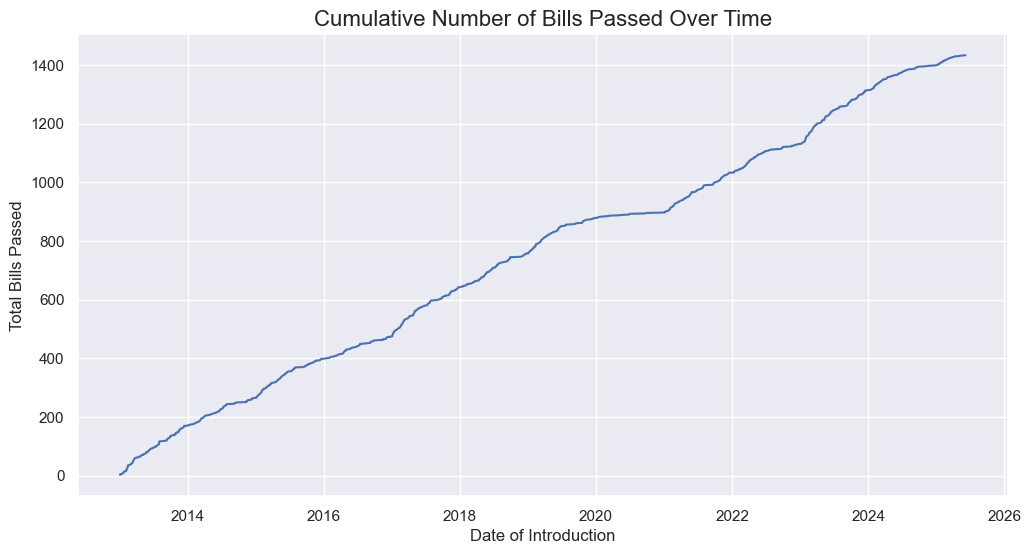

In [38]:
passed = cong_gov_df[cong_gov_df.law].copy()
passed.sort_values(by='date', inplace=True)
passed['cum_passed'] = np.arange(1, len(passed)+1)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 6))

# Create the line plot
plot = sns.lineplot(
    data=passed, 
    x='date', 
    y='cum_passed'
)

# Set titles and labels for clarity
plot.set_title('Cumulative Number of Bills Passed Over Time', fontsize=16)
plot.set_xlabel('Date of Introduction')
plot.set_ylabel('Total Bills Passed')

plt.show()

Seems pretty steady, albeit with a slump in 2020 for obvious reasons

<Axes: xlabel='date', ylabel='total_mentions'>

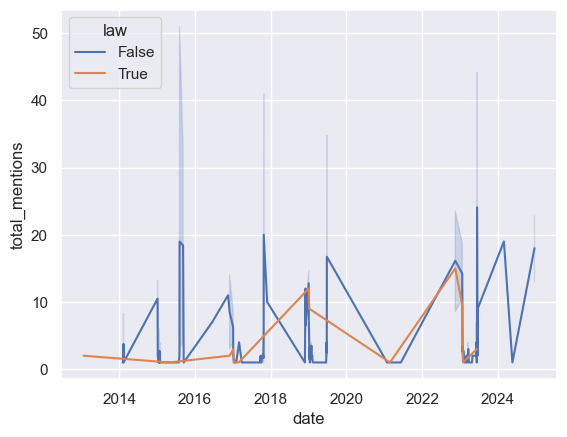

In [136]:
df['date'] = pd.to_datetime(df['date'], format='mixed')
sns.lineplot(df, x='date', y='total_mentions', hue='law')